In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numba.np.arraymath import np_delete

df_ads = pd.read_csv('advertising.csv')
df_ads.head()

,wechat,weibo,others,sales
0,304.4,93.6,294.4,9.7
1,1011.9,34.4,398.4,16.7
2,1091.1,32.8,295.2,17.3
3,85.5,173.6,403.2,7.0
4,1047.0,302.4,553.6,22.1


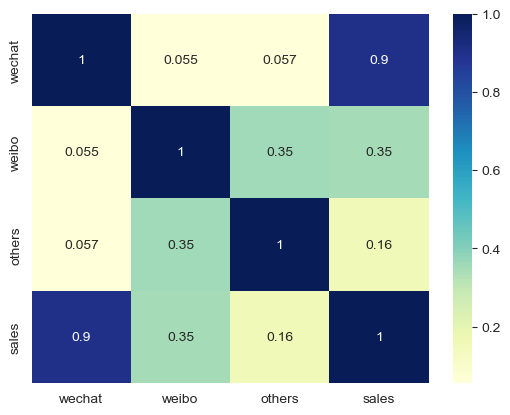

In [3]:
# 数据的相关分析
# 生成热力图  
# 1表示相等  0.9显著相关  0.3没有明显联系

import matplotlib.pyplot as plt # 画图工具
import seaborn as sns # 可视化工具库

sns.heatmap(df_ads.corr(), cmap="YlGnBu", annot=True)
# .corr() 方法计算数据框中各列之间的相关系数矩阵，返回一个二维数组，其中每个元素表示两列之间的相关性。
# "YlGnBu" 是一个预定义的颜色映射，表示从黄色（Yellow）到绿色（Green）再到蓝色（Blue）的渐变。
# annot 参数用于控制是否在热力图的每个单元格中显示数值。
plt.show()

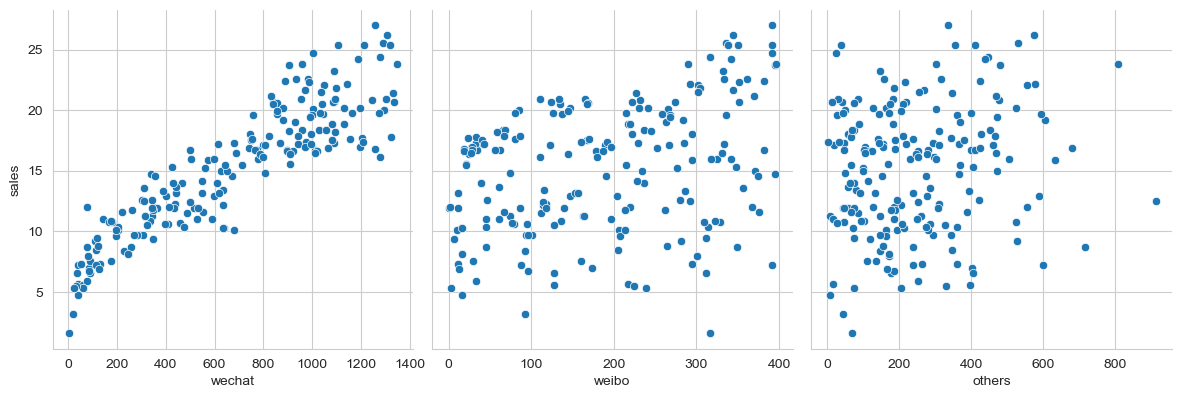

In [4]:
# 数据散点图
sns.pairplot(df_ads,
             x_vars=['wechat','weibo','others'],
             y_vars='sales',
             height=4,kind='scatter')
plt.show()

In [5]:
# 数据集清洗和规范化
# 为了简化模型，仅将微信的数据拿出来进行单变量的回归分析
x = np.array(df_ads.wechat) # 构建特征集 只有微信公众号一个特征
y = np.array(df_ads.sales) # 构建标签集 销售额
# print("张量的阶:",x.ndim)
# print("X的形状:",x.shape)
# print("x:",x)
print("张量的阶:",y.ndim)
print("y的形状:",y.shape)
print("y:",y)

张量的阶: 1
y的形状: (200,)
y: [ 9.7 16.7 17.3  7.  22.1 17.2 16.1  5.7 11.3  9.4 17.1  4.8  7.2 22.4
 13.4 11.  10.1 16.7 12.2 12.3 10.9 18.9 20.7 11.9 15.  12.9 10.5 15.9
 19.6 17.1 11.3  9.2 14.7 13.2  8.4 12.  16.7 20.1  5.6  6.6 24.4 18.
 17.1 23.7  8.7 20.7 14.6 11.9 16.9  7.6  7.3  7.2  9.6 19.6  9.7 20.8
 17.3 12.6 16.9 17.4 26.2 20.9 17.  11.5 18.4 21.2 22.6 11.  18.2 18.
 25.5 10.3 14.6 20.6  1.6 17.2  7.3 12.9 23.8 12.  24.2 17.7 16.7 11.9
 19.7 21.8 15.6 20.  13.6 12.  19.2 23.2  3.2 16.6 25.4 20.5 15.3  9.5
 20.2 17.  16.6  8.5  5.9  5.3 17.5 10.1 11.8 20.7 17.8 17.6 27.  17.5
  5.5 16.4 20.9 17.4 16.7 14.  14.  10.4  5.3 13.2 20.9 11.3 10.3 10.6
 15.2 16.  17.6 20.2 22.6 18.4 19.7 19.8 11.6 16.8 10.1 14.2 15.   8.
 12.4 19.8 11.6 21.7 16.  16.6 22.2 17.2 22.3 25.4 12.6 11.  18.4 10.8
 18.9  8.7 16.5 17.9 19.  10.8  9.7 17.9 19.8 16.  19.4 11.9 20.7 12.5
 25.4 14.8 24.7 11.8 13.7 13.3 15.5  8.1 20.5  6.6  6.7 16.4 14.   7.6
 21.5 15.5 10.9 10.7 10.6 21.4 13.2 19.9 18.3 10.4 23.8 

In [6]:
# 对于回归问题 机器学习模型所读入的规范格式应该是2D张量 也就是矩阵 （样本数， 标签数）
# 行是数据 列是特征
x = x.reshape((len(x),1))
y = y.reshape((len(y),1))
# print("张量的阶:",x.ndim)
# print("X的形状:",x.shape)
# print("x:",x)
print("张量的阶:",y.ndim)
print("y的形状:",y.shape)
print("y:",y)

张量的阶: 2
y的形状: (200, 1)
y: [[ 9.7]
 [16.7]
 [17.3]
 [ 7. ]
 [22.1]
 [17.2]
 [16.1]
 [ 5.7]
 [11.3]
 [ 9.4]
 [17.1]
 [ 4.8]
 [ 7.2]
 [22.4]
 [13.4]
 [11. ]
 [10.1]
 [16.7]
 [12.2]
 [12.3]
 [10.9]
 [18.9]
 [20.7]
 [11.9]
 [15. ]
 [12.9]
 [10.5]
 [15.9]
 [19.6]
 [17.1]
 [11.3]
 [ 9.2]
 [14.7]
 [13.2]
 [ 8.4]
 [12. ]
 [16.7]
 [20.1]
 [ 5.6]
 [ 6.6]
 [24.4]
 [18. ]
 [17.1]
 [23.7]
 [ 8.7]
 [20.7]
 [14.6]
 [11.9]
 [16.9]
 [ 7.6]
 [ 7.3]
 [ 7.2]
 [ 9.6]
 [19.6]
 [ 9.7]
 [20.8]
 [17.3]
 [12.6]
 [16.9]
 [17.4]
 [26.2]
 [20.9]
 [17. ]
 [11.5]
 [18.4]
 [21.2]
 [22.6]
 [11. ]
 [18.2]
 [18. ]
 [25.5]
 [10.3]
 [14.6]
 [20.6]
 [ 1.6]
 [17.2]
 [ 7.3]
 [12.9]
 [23.8]
 [12. ]
 [24.2]
 [17.7]
 [16.7]
 [11.9]
 [19.7]
 [21.8]
 [15.6]
 [20. ]
 [13.6]
 [12. ]
 [19.2]
 [23.2]
 [ 3.2]
 [16.6]
 [25.4]
 [20.5]
 [15.3]
 [ 9.5]
 [20.2]
 [17. ]
 [16.6]
 [ 8.5]
 [ 5.9]
 [ 5.3]
 [17.5]
 [10.1]
 [11.8]
 [20.7]
 [17.8]
 [17.6]
 [27. ]
 [17.5]
 [ 5.5]
 [16.4]
 [20.9]
 [17.4]
 [16.7]
 [14. ]
 [14. ]
 [10.4]
 [ 5.3]
 [13.2

In [7]:
# 拆分数据集为训练集和测试集
# 八成训练 两成测试
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
# 数据归一化

# 压缩方法
def scaler(train, test):
    min = train.min(axis=0) # 训练集最小值
    max = train.max(axis=0) # 训练集最大值
    gap = max - min
    train -= min # 所有数据减去最小值
    train /= gap
    test -= min # 把训练集最小值应用于测试集
    test /= gap # 把训练集最大值和最小值的差应用于数据集
    return train, test

x_train, x_test = scaler(x_train, x_test)
y_train, y_test = scaler(y_train, y_test)

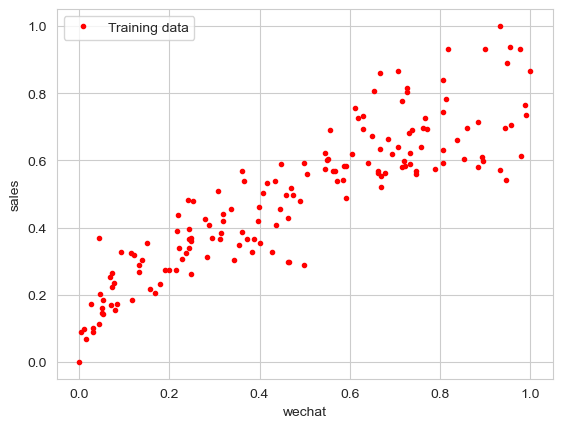

In [9]:
# 用之前已经导入的matplotlib.pyplot中的plot方法显示散点图
plt.plot(x_train, y_train, 'r.', label='Training data')
# 'r.'：这是一个格式字符串，用于指定绘图的样式。'r' 表示红色，'.' 表示点状标记
plt.xlabel('wechat')
plt.ylabel('sales')
plt.legend() # 显示图例
plt.show()

In [10]:
def loss_function(x, y, weight, bias):
    y_hat = weight*x + bias
    loss = y_hat - y
    cost = np.sum(loss**2)/(2*len(x))
    return cost

In [11]:
iteration = 500
alpha = 0.5
weight = -5
bias = 3
loss = loss_function(x_train, y_train, weight, bias)
print('当前损失:', loss)

当前损失: 1.343795534906634


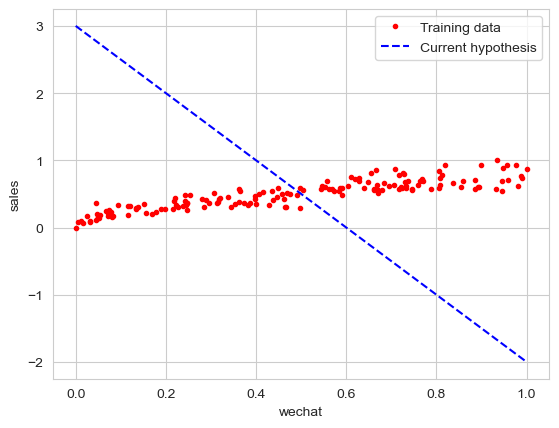

In [12]:
# 绘制当前的函数模型
plt.plot(x_train, y_train, 'r.', label='Training data') # 显示训练数据
line_X = np.linspace(x_train.min(), x_train.max(), 500) # X 值域
line_y = [weight*xx + bias for xx in line_X] # 假设函数 y_hat
plt.plot(line_X, line_y, 'b--', label='Current hypothesis' ) #显示当前假设函数
plt.xlabel('wechat') # x 轴标签
plt.ylabel('sales') # y 轴标签
plt.legend() # 显示图例
plt.show() # 显示函数图像

In [13]:
# 梯度下降
import numpy as np

from NO_3.MSE import loss_function


def gradient_descent(x, y, w, b, lr, iter):
    l_history = np.zeros(iter) # 初始化记录梯度下降过程中损失的数组
    w_history = np.zeros(iter) # 初始化记录梯度下降过程中权重的数组
    b_history = np.zeros(iter) # 初始化记录梯度下降过程中偏置的数组
    for i in range(iter): # 进行梯度下降的迭代, 就是下多少级台阶
        y_hat = w*x + b # 这是向量化运算实现的假设函数
        loss = y_hat-y # 这是中间过程, 求得的是假设函数预测的 y'和真正的 y 值间的差值
        derivative_w = x.T.dot(loss)/len(x) # 对权重求导, len(X)是样本总数
        derivative_b = sum(loss)*1/len(x) # 对偏置求导
        w = w - lr*derivative_w # 结合学习速率 alpha 更新权重
        b = b - lr*derivative_b # 结合学习速率 alpha 更新偏置
        l_history[i] = loss_function(x, y, w, b) # 梯度下降过程中损失的历史记录
        w_history[i] = w # 梯度下降过程中权重的历史记录
        b_history[i] = b # 梯度下降过程中偏置的历史记录
    return l_history, w_history, b_history # 返回梯度下降过程中的数据

In [14]:
# import gradient_descent
loss_history, weight_history, bias_history = gradient_descent(
    x_train, y_train, weight, bias, alpha, iteration 
)
# print('最终损失:', loss_history)

C:\Users\zhaoyushi00\AppData\Local\Temp\ipykernel_11608\2915073687.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w_history[i] = w # 梯度下降过程中权重的历史记录
C:\Users\zhaoyushi00\AppData\Local\Temp\ipykernel_11608\2915073687.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_history[i] = b # 梯度下降过程中偏置的历史记录


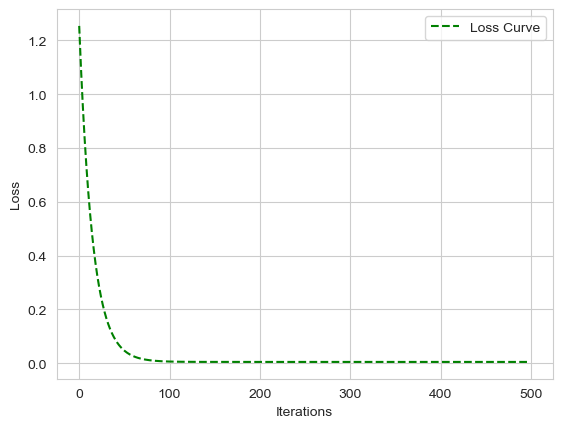

In [15]:
plt.plot(loss_history, 'g--', label='Loss Curve') # 显示损失曲线
plt.xlabel('Iterations') # x 轴标签
plt.ylabel('Loss') # y 轴标签
plt.legend() # 显示图例
plt.show() # 显示损失曲线

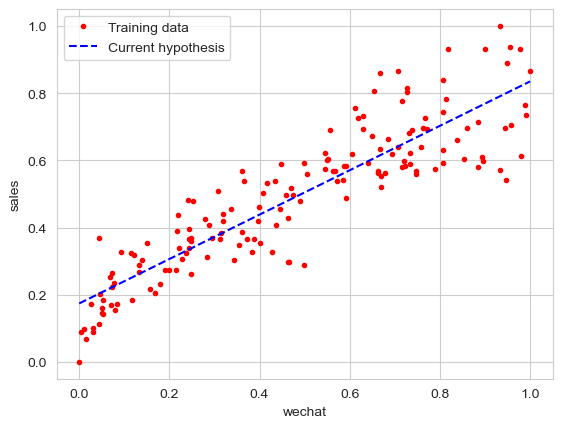

In [16]:
plt.plot(x_train, y_train, 'r.', label='Training data') #显示训练数据
line_X = np.linspace(x_train.min(), x_train.max(), 500) # X 值域
# 关于 weight_history[-1], 这里的索引[-1], 就代表迭代 500 次后的最后一个 W 值
line_y = [weight_history[-1]*xx + bias_history[-1] for xx in line_X] # 假设函数
plt.plot(line_X, line_y, 'b--', label='Current hypothesis' ) # 显示当前假设函数
plt.xlabel('wechat') # x 轴标签
plt.ylabel('sales') # y 轴标签
plt.legend() # 显示图例
plt.show() # 显示函数图像

In [17]:
print ('当前损失：', loss_function(x_train, y_train,
weight_history[-1], bias_history[-1]))
print ('当前权重：', weight_history[-1])
print ('当前偏置：', bias_history[-1])

当前损失： 0.004656476067578383
当前权重： 0.6608379367844583
当前偏置： 0.1740275976937266


In [18]:
print ('测试集损失：', loss_function(x_test, y_test,
weight_history[-1], bias_history[-1]))

测试集损失： 0.004534058501861003


In [22]:
# 多远线性回归模型
X = np.array(df_ads)
X = np.delete(X, [3], axis=1) # 删除标签列
# axis=1 指定沿列方向删除。如果 axis=0，则会沿行方向删除。如果不指定 axis，则 X 将被视为展平后的数组进行处理。
y = np.array(df_ads.sales)
y = y.reshape(len(y),1)
print("X的维度:",X.shape)
print("X的阶:",X.ndim)
# print(X)
print("y的维度:",y.shape)
print("y的阶:",y.ndim)

X的维度: (200, 3)
X的阶: 2
y的维度: (200, 1)
y的阶: 2


In [ ]:
# 为X训练集添加x0维特征，并将其设置为全1向量
x0_train = np.ones((len(x_train),1))
X_train = np.append(x0_train, x_train, axis=1)
print("X_train的维度:",X_train.shape)
print("X_train的阶:",X_train.ndim)
print("X_train:",X_train)